# Cluster Exploration

Look for clusters and understand their attributes

In [28]:
# Load Required Packages
library(plotly)
library(data.table)
library(ggplot2)
library(reshape2)
library(rattle)
library(GGally)
library(rCharts)
library(MASS)

# Session Options
options(repr.plot.width=10, repr.plot.height=7)

In [6]:
# Source Data
dt <- fread('/Users/yassineltahir/Downloads/analysisProblemForInterview.csv', 
            colClasses=list(character=1:7))

# Clean & format data
dt$Customer_ID <- as.factor(dt$Customer_ID)
dt$result_rank <- as.numeric(dt$result_rank)
dt$provider_Nm <- as.factor(dt$provider_Nm)
dt$product_name <- as.factor(dt$product_name)
dt$dummy_quote_value <- as.numeric(ifelse(dt$dummy_quote_value == 'MISSING', NA, dt$dummy_quote_value))
dt$Sale_made <- as.factor(dt$Sale_made)
dt$Sale_source <- as.factor(dt$Sale_source)
dt[Sale_source==""]$Sale_source <- "No Sale"


## Parallel Coordinates

Please see 'https://github.com/yassin-eltahir/playground/tree/master/iselect/par_coords' for an interactive version.

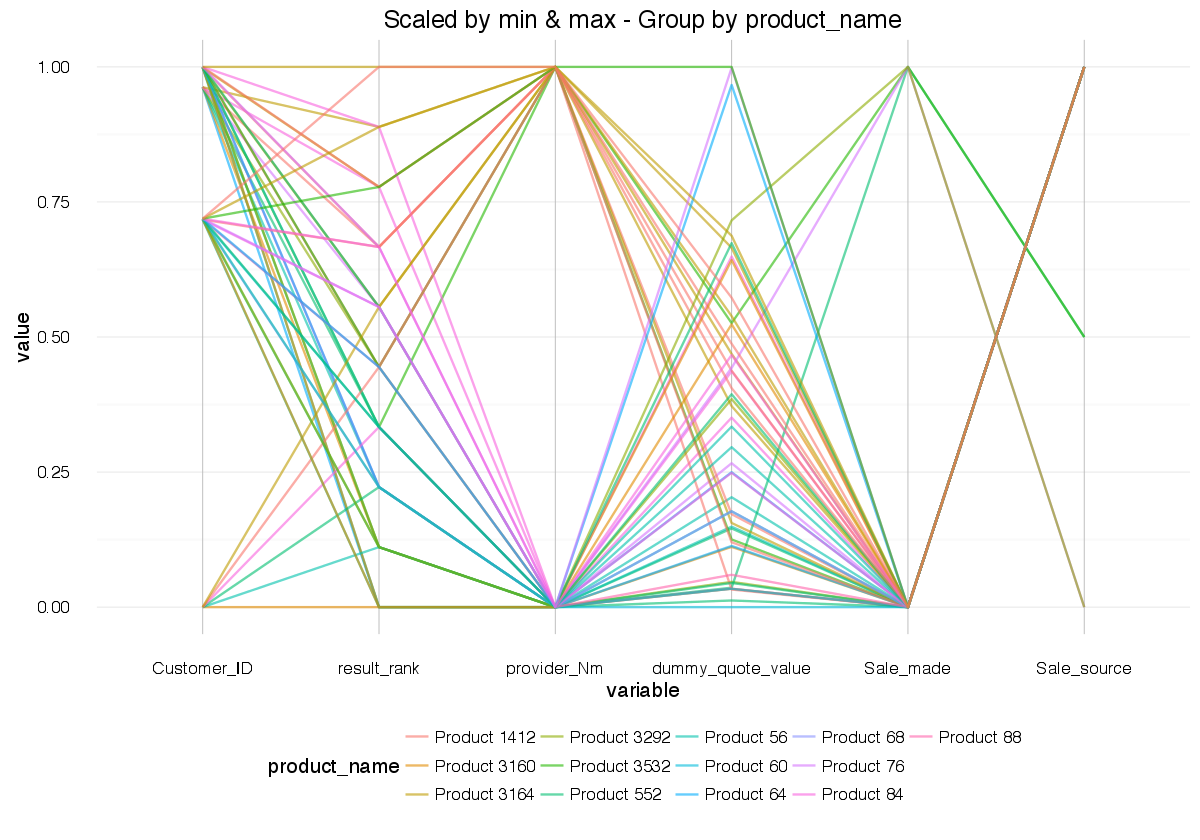

In [54]:
# Select which columns to plot
colour_by <- 'product_name'
cols <- which(names(dt)!=colour_by)

p <- ggparcoord(dt[1:50],
          columns = cols ,
          groupColumn = colour_by,
          boxplot=F,
          scale='uniminmax',
          showPoints=F,
          alphaLine=0.6,
          title = sprintf('Scaled by min & max - Group by %s',colour_by))

# Start with a basic theme
p <- p + theme_minimal()

# # Darken vertical lines
p <- p + theme(panel.grid.major.x = element_line(color = "#bbbbbb"))

# # Move label to bottom
p <- p + theme(legend.position = "bottom")

# Display parallel coordinate plot
print(p)